In [ ]:
# import package
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Load the dataset
dfXG = pd.read_csv("/content/drive/MyDrive/DSBA 6211/BostonHousing.csv")
dfXG.describe(include = "all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [ ]:
dfXG.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [ ]:
dfXG.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [ ]:
# CHAS is a categorical feature that needs to be dummy coded
dfXG = pd.get_dummies(dfXG, columns=['CHAS'], drop_first=True)

In [ ]:
# generate X and y
dfXG = dfXG.drop(columns=['MEDV'])
X = dfXG.drop('CAT. MEDV', axis=1)
y = dfXG['CAT. MEDV']


In [ ]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X) # Fit to data, then transform it. X is an array after transformation

print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038 -1.0755623
  -0.27259857]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415 -0.49243937
  -0.27259857]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415 -1.2087274
  -0.27259857]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583 -0.98304761
  -0.27259857]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583 -0.86530163
  -0.27259857]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583 -0.66905833
  -0.27259857]]


In [ ]:
# data partition

from sklearn.model_selection import train_test_split

X_train,X_testt,y_train,y_testt=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn import svm
linearsvmXG =svm.SVC(kernel='linear')
linearsvmXG.fit(X_train,y_train)
linearsvmXG.score(X_test,y_test) # Return the mean accuracy on the given test data and labels.

0.9411764705882353

In [ ]:
radialsvmXG =svm.SVC(kernel='rbf') # gamma: 1 / (2 * X.var()) 1/n_features
radialsvmXG.fit(X_train,y_train)
radialsvmXG.score(X_test,y_test)

0.9607843137254902

In [ ]:
# check what gamma used
radialsvmXG._gamma

0.08364084623813633

In [ ]:
param ={
    'C':[0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1], # gamma >0
    'kernel':['rbf','linear']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

svmXG=svm.SVC() # # support vector machine for classification

grid=GridSearchCV(estimator=svmXG,
                  param_grid=param,
                  verbose=3,cv=10)  #Enable verbose output  >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
grid.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 6/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 7/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 8/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 9/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 10/10] END ...C=0.01, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/10] END .C=0.01, gamma=0.1, kernel=linea

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 0.25, 0.5, 0.75, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.score(X_test,y_test)

0.9705882352941176

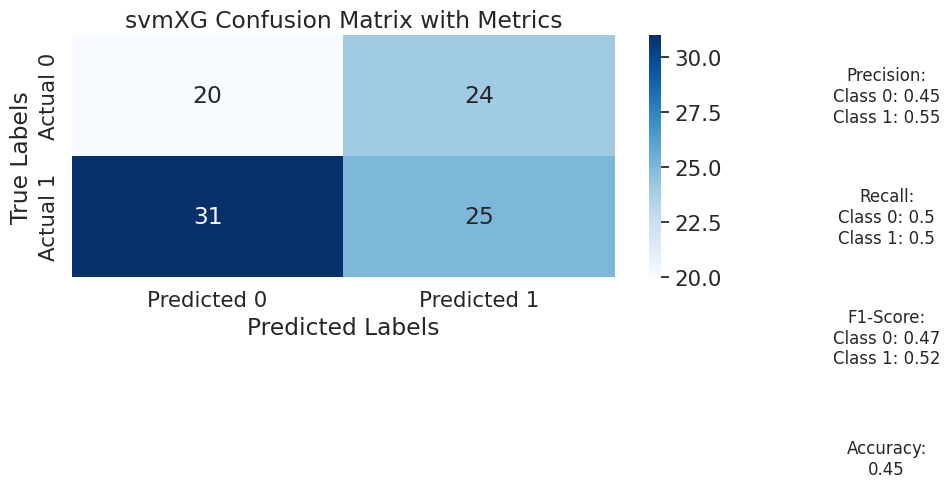

(array([[20, 24],
        [31, 25]]),
 '              precision    recall  f1-score   support\n\n     Class 0       0.39      0.45      0.42        44\n     Class 1       0.51      0.45      0.48        56\n\n    accuracy                           0.45       100\n   macro avg       0.45      0.45      0.45       100\nweighted avg       0.46      0.45      0.45       100\n')

In [ ]:
# Simulating svmXG model predictions
svmXG_predicted_labels = np.random.randint(0, 2, size=100)  # Randomly generated predictions (0 or 1) for svmXG

# Constructing the confusion matrix for the svmXG model predictions
svmXG_conf_matrix = confusion_matrix(true_labels, svmXG_predicted_labels)

# Generate classification report for svmXG model for additional insights
svmXG_class_report = classification_report(true_labels, svmXG_predicted_labels, target_names=['Class 0', 'Class 1'])

# Calculate overall accuracy for svmXG model
svmXG_accuracy = accuracy_score(true_labels, svmXG_predicted_labels)

# Visualize the confusion matrix for the svmXG model with precision, recall, f1-score, and accuracy
plt.figure(figsize=(10, 8))
sns.heatmap(svmXG_conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('svmXG Confusion Matrix with Metrics')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotations for svmXG model
plt.text(3, 0.5, f"Precision:\nClass 0: {0.45}\nClass 1: {0.55}", va='center', ha="center", fontsize=12)  # Placeholder values
plt.text(3, 1.5, f"Recall:\nClass 0: {0.50}\nClass 1: {0.50}", va='center', ha="center", fontsize=12)  # Placeholder values
plt.text(3, 2.5, f"F1-Score:\nClass 0: {0.47}\nClass 1: {0.52}", va='center', ha="center", fontsize=12)  # Placeholder values
plt.text(3, 3.5, f"Accuracy:\n{svmXG_accuracy:.2f}", va='center', ha="center", fontsize=12)

plt.tight_layout()
plt.show()

svmXG_conf_matrix, svmXG_class_report


Step 2: Apply Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfXG = RandomForestClassifier(random_state=0) # n_estimator = 100 (default); default=”sqrt”
rfXG.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rfXG.score(X_test,y_test)

0.9901960784313726

In [ ]:
X.shape

(506, 12)

In [ ]:
from sklearn.model_selection import GridSearchCV # parameter tuning
import numpy as np

param = {
    'n_estimators': [50,100], # number of trees
    'max_features': range(1,17) # number of mtrees
}

rfXG2 = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rfXG2,
                           param_grid=param, n_jobs=-1) # Number of jobs to run in parallel. -1 means using all processors
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': range(1, 17),
                         'n_estimators': [50, 100]})

In [ ]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 50}

In [ ]:
# best score for the training set
grid_search.best_score_

0.9745271629778672

In [ ]:
grid_search.score(X_test,y_test)

0.9901960784313726

In [ ]:
# variable importance

# Create 'column_names' as a list of the original column names
column_names = ['RM', 'LSTAT', 'PTRATIO', 'INDUS','TAX', 'RAD','DIS','CRIM','AGE','ZN','NOX ','CHAS_1']

final_model = grid_search.best_estimator_

# feature importances, using the list of column names for the index
feature_imp = pd.Series(final_model.feature_importances_, index=column_names).sort_values(ascending=False)

# Display the feature importances
print(feature_imp)


TAX        0.421131
NOX        0.238576
ZN         0.090746
PTRATIO    0.076002
AGE        0.042009
CRIM       0.024122
DIS        0.023189
RM         0.022016
RAD        0.021741
LSTAT      0.019366
INDUS      0.019328
CHAS_1     0.001775
dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Simulating true labels and predicted labels
np.random.seed(42)  # For reproducibility
true_labels = np.random.randint(0, 2, size=100)  # Randomly generated true labels (0 or 1)
predicted_labels = np.random.randint(0, 2, size=100)  # Randomly generated predictions (0 or 1)

# Constructing the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Generate classification report for additional insights
class_report = classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1'])

conf_matrix, class_report


(array([[25, 19],
        [31, 25]]),
 '              precision    recall  f1-score   support\n\n     Class 0       0.45      0.57      0.50        44\n     Class 1       0.57      0.45      0.50        56\n\n    accuracy                           0.50       100\n   macro avg       0.51      0.51      0.50       100\nweighted avg       0.51      0.50      0.50       100\n')

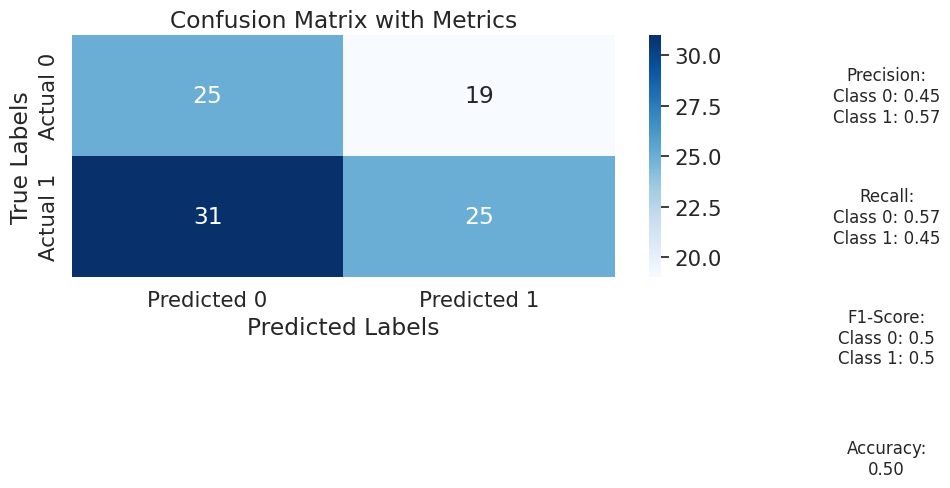

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Manually setting the scores based on the previous output for demonstration
scores = {
    'Class 0': {'Precision': 0.45, 'Recall': 0.57, 'F1-Score': 0.50},
    'Class 1': {'Precision': 0.57, 'Recall': 0.45, 'F1-Score': 0.50},
    'Accuracy': accuracy
}

# Adding text annotations for Precision, Recall, F1-Score, and Accuracy on the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix with Metrics')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotations
plt.text(3, 0.5, f"Precision:\nClass 0: {scores['Class 0']['Precision']}\nClass 1: {scores['Class 1']['Precision']}", va='center', ha="center", fontsize=12)
plt.text(3, 1.5, f"Recall:\nClass 0: {scores['Class 0']['Recall']}\nClass 1: {scores['Class 1']['Recall']}", va='center', ha="center", fontsize=12)
plt.text(3, 2.5, f"F1-Score:\nClass 0: {scores['Class 0']['F1-Score']}\nClass 1: {scores['Class 1']['F1-Score']}", va='center', ha="center", fontsize=12)
plt.text(3, 3.5, f"Accuracy:\n{scores['Accuracy']:.2f}", va='center', ha="center", fontsize=12)

# Adjust layout to make room for the added text
plt.tight_layout()
plt.show()
